이미지 파일 다운로드. 말, 인간 분류하기 위한 사진 파일 다운로드 하기

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2022-06-15 00:40:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   263MB/s    in 0.5s    

2022-06-15 00:40:06 (263 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2022-06-15 00:44:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.07s   

2022-06-15 00:44:02 (167 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



압축파일 풀기

In [3]:
import zipfile

In [4]:
zip_ref = zipfile.ZipFile('/tmp/horse-or-human.zip')

In [5]:
zip_ref.extractall('/tmp/horse-or-human')

In [6]:
zip_ref = zipfile.ZipFile('/tmp/validation-horse-or-human.zip')

In [7]:
zip_ref.extractall('/tmp/validation-horse-or-human')

In [8]:
zip_ref.close()

사진이 저장된 폴더 경로 만들기

In [9]:
train_horse_dir = '/tmp/horse-or-human/horses'

In [10]:
train_human_dir = '/tmp/horse-or-human/humans'

In [11]:
validation_horse_dir = '/tmp/validation-horse-or-human/horses'

In [12]:
validation_human_dir = '/tmp/validation-horse-or-human/humans'

각 폴더에 저장되어 있는 사진파일이름들 출력하기

In [13]:
import os

In [15]:
train_horse_names = os.listdir(train_horse_dir)

In [17]:
train_human_names = os.listdir(train_human_dir)

In [19]:
validation_horse_names = os.listdir(validation_horse_dir)

In [20]:
validation_human_names = os.listdir(validation_human_dir)

각 디렉토리에 저장된 파일의 갯수 확인하기

In [16]:
len(train_horse_names)

500

In [18]:
len(train_human_names)

527

In [21]:
len(validation_horse_names)

128

In [22]:
len(validation_human_names)

128

시각화로, 사진 이미지 확인해 보기

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

말 8개, 사람 8개씩 이미지 표시하기

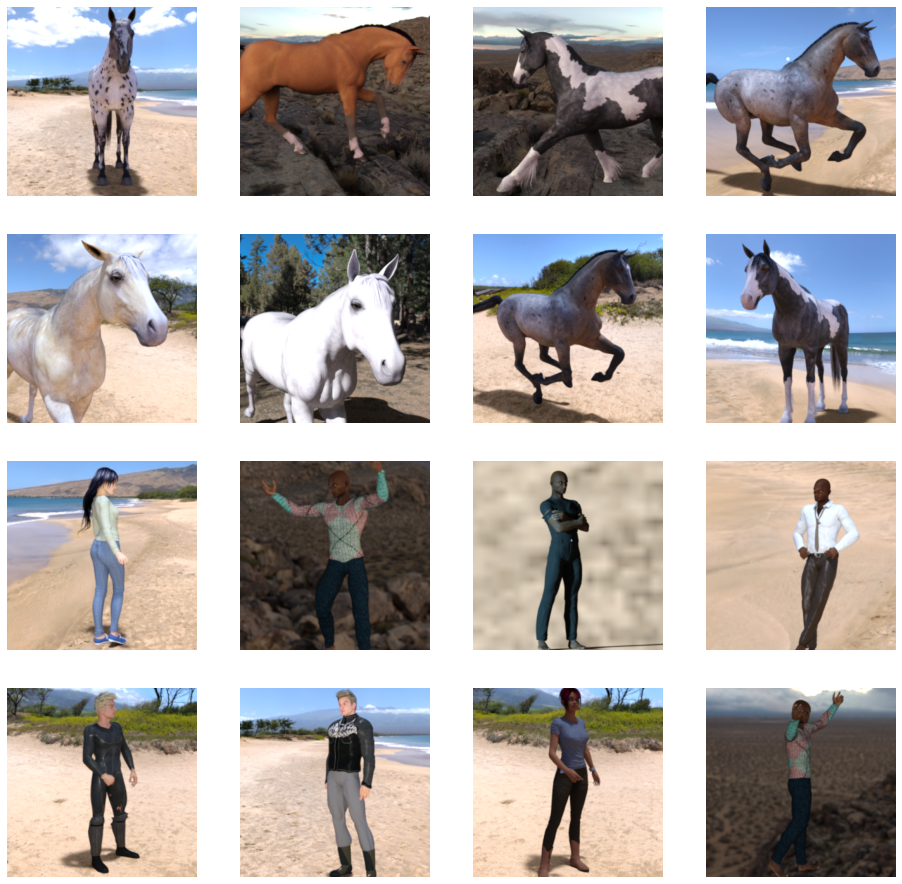

In [24]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Building a Small Model from Scratch
이미지는 300X300 칼라 이미지다.
간단한 모델링 하기.
사진의 결과는 2개중의 하나이미로, 맨 마지막 액티베이션 함수는 시그모이드 사용

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [26]:
def build_model():
  model = Sequential()
  model.add( Conv2D(16, (3,3),  activation='relu', input_shape=(300, 300,3)  ) )
  model.add( MaxPooling2D(  (2,2) , 2  ))
  model.add( Conv2D(32, (3,3), activation='relu'))
  model.add( MaxPooling2D( 2,  2))
  model.add( Conv2D(64, (3,3), activation='relu'))
  model.add( MaxPooling2D( 2,  2))

  model.add( Flatten() )
  model.add( Dense(512, activation='relu'))
  model.add( Dense(1, activation='sigmoid'))

  return model

In [27]:
model = build_model()

prints a summary of the NN 

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

**NOTE**: 각 알고리즘 레퍼런스 페이지 

 [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) RMSprop automates learning-rate tuning for us

 [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD)
 
 
  [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.

 RMSprop optimization algorithm 사용하여 컴파일 해보자

In [29]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Preprocessing



In [30]:
# 학습시킬 데이터는 넘파이 어레이 인데, 현재 우리는 png 파일로만 준비가 되어있다.
# 따라서 이미지파일을 넘파이로 바꿔주는 라이브러리를, 텐서플로우가 제공해준다.

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
train_datagen = ImageDataGenerator(rescale= 1/255.0)

In [34]:
validation_datagen = ImageDataGenerator(rescale= 1/255.0)

In [35]:
# 변수로 만들어 줬으면, 그다음 할일은,
# 이미지가 들어있는 디렉토리의 정보, 이미지 사이즈 정보, 분류할 갯수 정보를 알려줘야 한다.

In [ ]:
# target_size 와 input_shape 은 가로,세로가 같아야 한다!

In [ ]:
# 아래 train_generator는 , 넘파이어레이와, 해당 이미지의 정답지도 가지고 있는 변수다.
# 즉, X_train 과 y_train을 모두 한꺼번에 가지고 있다!

In [37]:
train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human', target_size=(300,300), class_mode='binary' )

Found 1027 images belonging to 2 classes.


In [39]:
validation_generator = \
  validation_datagen.flow_from_directory('/tmp/validation-horse-or-human',  target_size=(300,300), class_mode='binary' )

Found 256 images belonging to 2 classes.


### Training
Let's train for 15 epochs 

In [ ]:
epoch_history = model.fit(train_generator, epochs=20, validation_data=(validation_generator)   )

Epoch 1/20


###Running the Model


